In [1]:
import os
from os.path import join
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

### Loading face dataset

In [2]:
face_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Datasets/ffhq256/ffhq256"

In [8]:
imgid = 100
img = Image.open(join(face_root, f"{imgid:05d}.png"))

In [10]:
img.size

(256, 256)

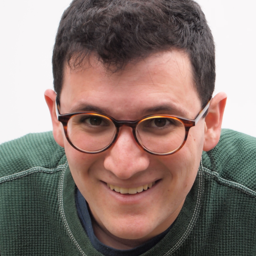

In [11]:
img

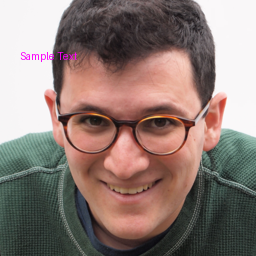

In [18]:
from PIL import ImageDraw

# Create a copy of the image to draw on
img_with_text = img.copy()
draw = ImageDraw.Draw(img_with_text)
# Add text to the image
text = "Sample Text"
position = (20, 50)  # Top-left corner coordinates
text_color = (250, 0, 250) #(255, 255, 255)  # White color in RGB
draw.text(position, text, fill=text_color)
img_with_text

In [ ]:
!ls /usr/share/fonts/dejavu/DejaVuSansMono.ttf

DejaVuSansMono-BoldOblique.ttf	DejaVuSansMono-Oblique.ttf
DejaVuSansMono-Bold.ttf		DejaVuSansMono.ttf


### Text rendering

In [2]:
kbd = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSansMono.ttf",26)

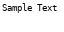

In [3]:
# Create a blank white image
text_img = Image.new('RGB', (64, 32), color='white')
draw = ImageDraw.Draw(text_img)
# Add text to the image
text = "Sample Text"
position = (2, 2)  # Top-left corner coordinates
text_color = (0, 0, 0)  # Black color in RGB
# Use default font since Arial.ttf may not be available
# font = ImageFont.truetype("DejaVuSans.ttf", size=12)  # Choose a font size of 12 pixels
font = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSansMono.ttf", size=9)
draw.text(position, text, fill=text_color, font=font)
text_img

In [4]:
# Download word list if not already downloaded
import nltk
from nltk.corpus import words
nltk.download('words')
word_list = words.words()

[nltk_data] Downloading package words to
[nltk_data]     /n/home12/binxuwang/nltk_data...
[nltk_data]   Package words is already up-to-date!


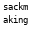

In [138]:
import os
import random
import numpy as np
import torch
from tqdm import trange, tqdm
from PIL import ImageFont

# develop dataset sample structure
font = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSansMono.ttf", size=9)
# Create a blank white image
text_img = Image.new('RGB', (32, 32), color='white')
draw = ImageDraw.Draw(text_img)
# Select random word
text = random.choice(word_list)
# Add line break to make two lines
line_break = 5
text = '\n'.join([text[i:i+line_break] for i in range(0, len(text), line_break)])
# shift the position with jitter 
xpos = np.random.randint(1,4)
ypos = np.random.randint(1,4)
position = (xpos, ypos)  # Top-left corner coordinates
text_color = (0, 0, 0)  # Black color in RGB
# Draw text on image
draw.text(position, text, fill=text_color, font=font)
draw._image

In [101]:
!mkdir $STORE_DIR/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset

mkdir: cannot create directory ‘/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset’: File exists


In [51]:
!echo $STORE_DIR/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset

/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset


In [139]:
import os
import random
import numpy as np
import torch
from tqdm import trange, tqdm
from PIL import ImageFont
from nltk.corpus import words


# Download word list if not already downloaded
import nltk
nltk.download('words')
word_list = words.words()

# Create output directory if it doesn't exist
output_dir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Font configuration
font = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSansMono.ttf", size=9)

# Generate dataset
num_samples = 10000  # Number of images to generate
image_tensor = torch.zeros((num_samples, 1, 32, 64))  # [N, C, H, W] format

for i in trange(num_samples):
    # Create a blank white image
    text_img = Image.new('RGB', (64, 32), color='white')
    draw = ImageDraw.Draw(text_img)
    # Select random word
    text = random.choice(word_list)
    # shift the position with jitter 
    xpos = np.random.randint(8)
    ypos = np.random.randint(8)
    position = (xpos, ypos)  # Top-left corner coordinates
    text_color = (0, 0, 0)  # Black color in RGB
    # Draw text on image
    draw.text(position, text, fill=text_color, font=font)
    # Save image with word as filename
    filename = f"{text}_{i}.png"
    text_img.save(os.path.join(output_dir, filename))
    # Convert PIL image to tensor and add to tensor dataset
    img_array = np.array(text_img)
    img_tensor = torch.from_numpy(img_array).permute(2, 0, 1).float().mean(dim=0) / 255.0
    image_tensor[i] = img_tensor

print(f"Generated {num_samples} images in {output_dir}")
print(f"Image tensor shape: {image_tensor.shape}")

[nltk_data] Downloading package words to
[nltk_data]     /n/home12/binxuwang/nltk_data...
[nltk_data]   Package words is already up-to-date!
  7%|▋         | 722/10000 [00:08<01:50, 83.66it/s] 


KeyboardInterrupt: 

In [157]:
!rm -r /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset/words32x32_50k/

In [158]:
!ls /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset/words32x32_50k/

ls: cannot access '/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset/words32x32_50k/': No such file or directory


In [140]:
import os
import random
import numpy as np
import torch
from tqdm import trange, tqdm
from PIL import ImageFont
from nltk.corpus import words


# Download word list if not already downloaded
import nltk
nltk.download('words')
word_list = words.words()

# Create output directory if it doesn't exist
output_dir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset/words32x32_50k"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Font configuration
font = ImageFont.truetype("/usr/share/fonts/dejavu/DejaVuSansMono.ttf", size=9)

# Generate dataset
num_samples = 50000  # Number of images to generate
image_tensor = torch.zeros((num_samples, 1, 32, 32))  # [N, C, H, W] format
text_list = []
for i in trange(num_samples):
    # Create a blank white image
    text_img = Image.new('RGB', (32, 32), color='white')
    draw = ImageDraw.Draw(text_img)
    # Select random word
    word = random.choice(word_list)
    # Add line break to make two lines
    line_break = 5
    text = '\n'.join([word[i:i+line_break] for i in range(0, len(word), line_break)])
    # shift the position with jitter 
    xpos = np.random.randint(1,6)
    ypos = np.random.randint(1,6)
    position = (xpos, ypos)  # Top-left corner coordinates
    text_color = (0, 0, 0)  # Black color in RGB
    # Draw text on image
    draw.text(position, text, fill=text_color, font=font)
    # Save image with word as filename
    filename = f"{word}_{i}.png"
    text_img.save(os.path.join(output_dir, filename))
    # Convert PIL image to tensor and add to tensor dataset
    img_array = np.array(text_img)
    img_tensor = torch.from_numpy(img_array).permute(2, 0, 1).float().mean(dim=0) / 255.0
    image_tensor[i] = img_tensor
    text_list.append(word)

print(f"Generated {num_samples} images in {output_dir}")
print(f"Image tensor shape: {image_tensor.shape}")
torch.save(image_tensor, "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset/words32x32_50k.pt")
pkl.dump(text_list, open("/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset/words32x32_50k_words.pkl", "wb"))

[nltk_data] Downloading package words to
[nltk_data]     /n/home12/binxuwang/nltk_data...
[nltk_data]   Package words is already up-to-date!
100%|██████████| 50000/50000 [06:14<00:00, 133.46it/s]

Generated 50000 images in /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset/words32x32_50k
Image tensor shape: torch.Size([50000, 1, 32, 32])


### Loading and analyzing text images


In [7]:
import pickle as pkl

In [8]:
image_tensor = torch.load("/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset/words32x32_50k.pt")
text_list = pkl.load(open("/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/DiffusionSpectralLearningCurve/wordnet_render_dataset/words32x32_50k_words.pkl", "rb"))

In [9]:
def compute_pca_stats(images, device="cuda", svd_lowrank=False, k=200):
    """Compute PCA statistics (mean, eigenvectors, eigenvalues) for a set of images
    
    Args:
        images: torch.Tensor or numpy.ndarray of shape (N, H, W) or (N, C, H, W)
        use_cuda: bool, whether to use GPU acceleration if available
    
    Returns:
        img_mean: torch.Tensor - mean image 
        eigval: torch.Tensor - eigenvalues in descending order
        eigvec: torch.Tensor - corresponding eigenvectors as columns
    """
    # Convert numpy to torch if needed
    if isinstance(images, np.ndarray):
        images = torch.from_numpy(images)
    # Ensure float type
    images = images.float()
    # Normalize to [0,1] if needed
    if images.max() > 1.0:
        images = images / 255.0
    # Move to GPU if requested
    if device == "cuda" and torch.cuda.is_available():
        images = images.cuda()
    # Reshape to (N, -1) for PCA
    N = images.shape[0]
    img_shape = images.shape[1:]
    X = images.view(N, -1)
    # Compute mean
    img_mean = torch.mean(X, dim=0)
    # Center the data
    X_centered = X - img_mean.unsqueeze(0)
    if svd_lowrank:
        # X_centered: (N, D), want top k PCs
        U, S, Vt = torch.svd_lowrank(X_centered, q=k, niter=2)
        # Vt is (k, D): each row is a principal component
        # If you want them as columns:
        eigvec = Vt  # (D, k)
        eigval = (S**2) / (N - 1)
    else:
        # Compute covariance matrix
        cov = torch.matmul(X_centered.T, X_centered) / (N - 1)
        # Compute eigendecomposition
        eigval, eigvec = torch.linalg.eigh(cov)
    # Sort in descending order
    sorted_indices = torch.argsort(eigval, descending=True)
    eigval = eigval[sorted_indices]
    eigvec = eigvec[:, sorted_indices]
    # Print summary statistics
    print(f"Mean shape: {img_mean.shape}")
    print(f"Mean value range: [{img_mean.min().item():.2f}, {img_mean.max().item():.2f}]")
    # print(f"Covariance matrix shape: {cov.shape}")
    print(f"Covariance eigval range: [{eigval.min().item():.2f}, {eigval.max().item():.2f}]")
    return img_mean, eigval, eigvec

In [10]:
def plot_eigenvectors(img_mean, eigval, eigvec, eigen_ids, img_shape=(128, 128), avg_color_channel=False):
    n_eigen = len(eigen_ids)
    ncols = 5
    nrows = (n_eigen + ncols ) // ncols
    plt.figure(figsize=(15, 3 * nrows))
    plt.subplot(nrows, ncols, 1)
    if len(img_shape) == 2:
        plt.imshow(img_mean.reshape(img_shape).cpu().numpy(), cmap='gray')
    else:
        plt.imshow(img_mean.reshape(img_shape).permute(1, 2, 0).cpu().numpy())
    plt.title('Mean Image')
    plt.axis('off')

    for i, eigen_id in enumerate(eigen_ids):
        plt.subplot(nrows, ncols, i + 2)
        # Reshape eigenvector back to image dimensions
        if len(img_shape) == 2:
            eigvec_img = eigvec[:, eigen_id].reshape(img_shape).cpu().numpy()
            plt.imshow(eigvec_img, cmap='RdBu')
        else:
            eigvec_img = eigvec[:, eigen_id].reshape(img_shape).permute(1, 2, 0).cpu().numpy()
            if avg_color_channel:
                eigvec_img = np.mean(eigvec_img, axis=-1)
                plt.imshow(eigvec_img, cmap='RdBu')
            else:
                plt.imshow(eigvec_img / eigvec_img.std())
        
        # Plot with a diverging colormap centered at 0
        plt.title(f'Eig{eigen_id}={eigval[eigen_id]:.1e}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

### Visualize mean and covariance

In [11]:
img_mean, eigval, eigvec = compute_pca_stats(image_tensor)

Mean shape: torch.Size([1024])
Mean value range: [0.59, 1.00]
Covariance eigval range: [-0.00, 4.84]


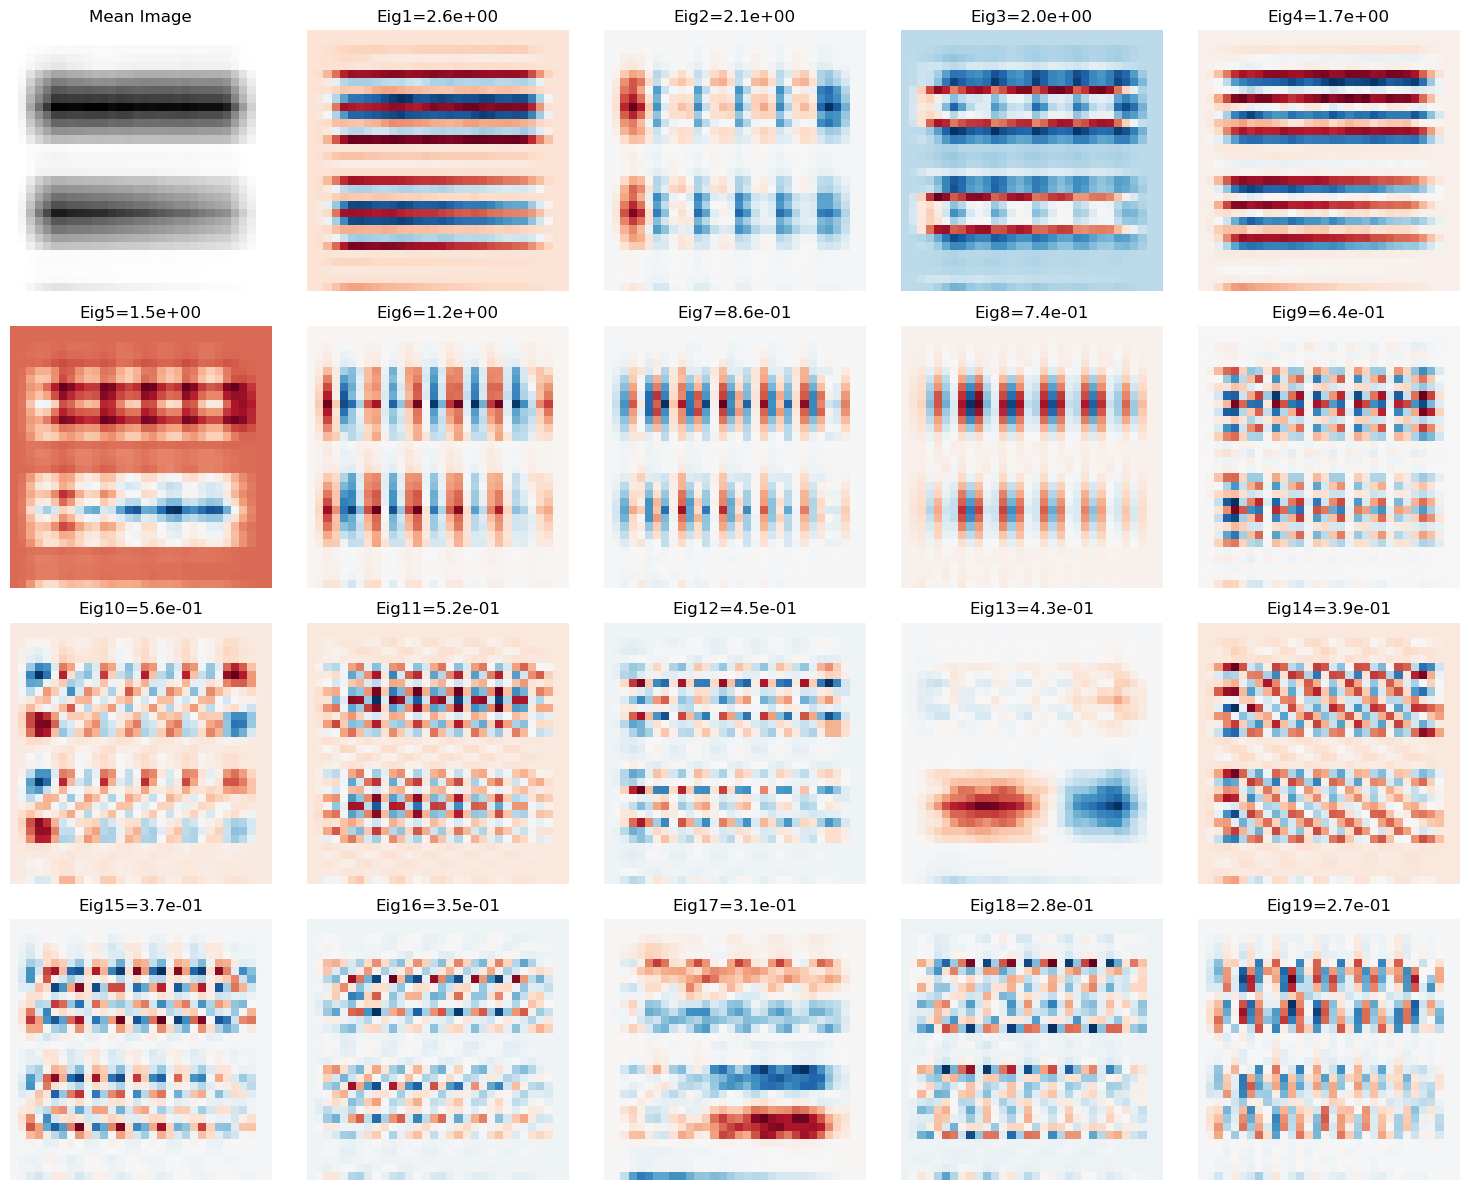

In [12]:
plot_eigenvectors(img_mean, eigval, eigvec, range(1, 20), img_shape=(32, 32))

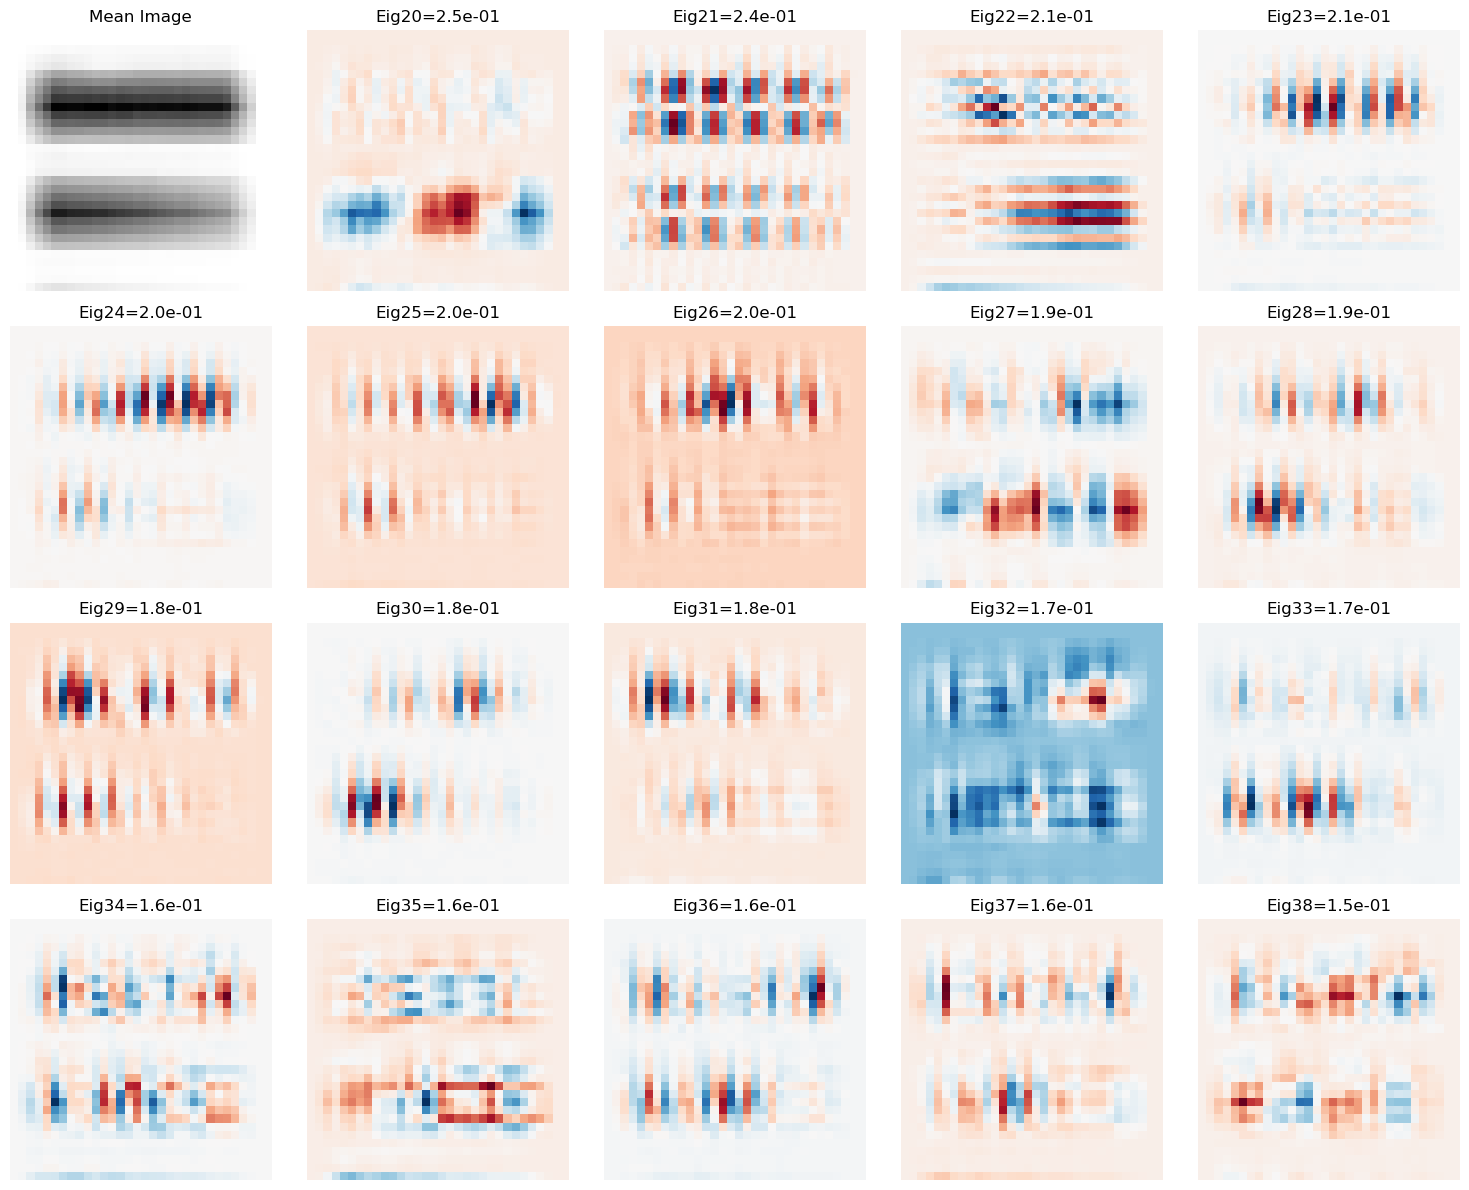

In [14]:
plot_eigenvectors(img_mean, eigval, eigvec, range(20, 39), img_shape=(32, 32))

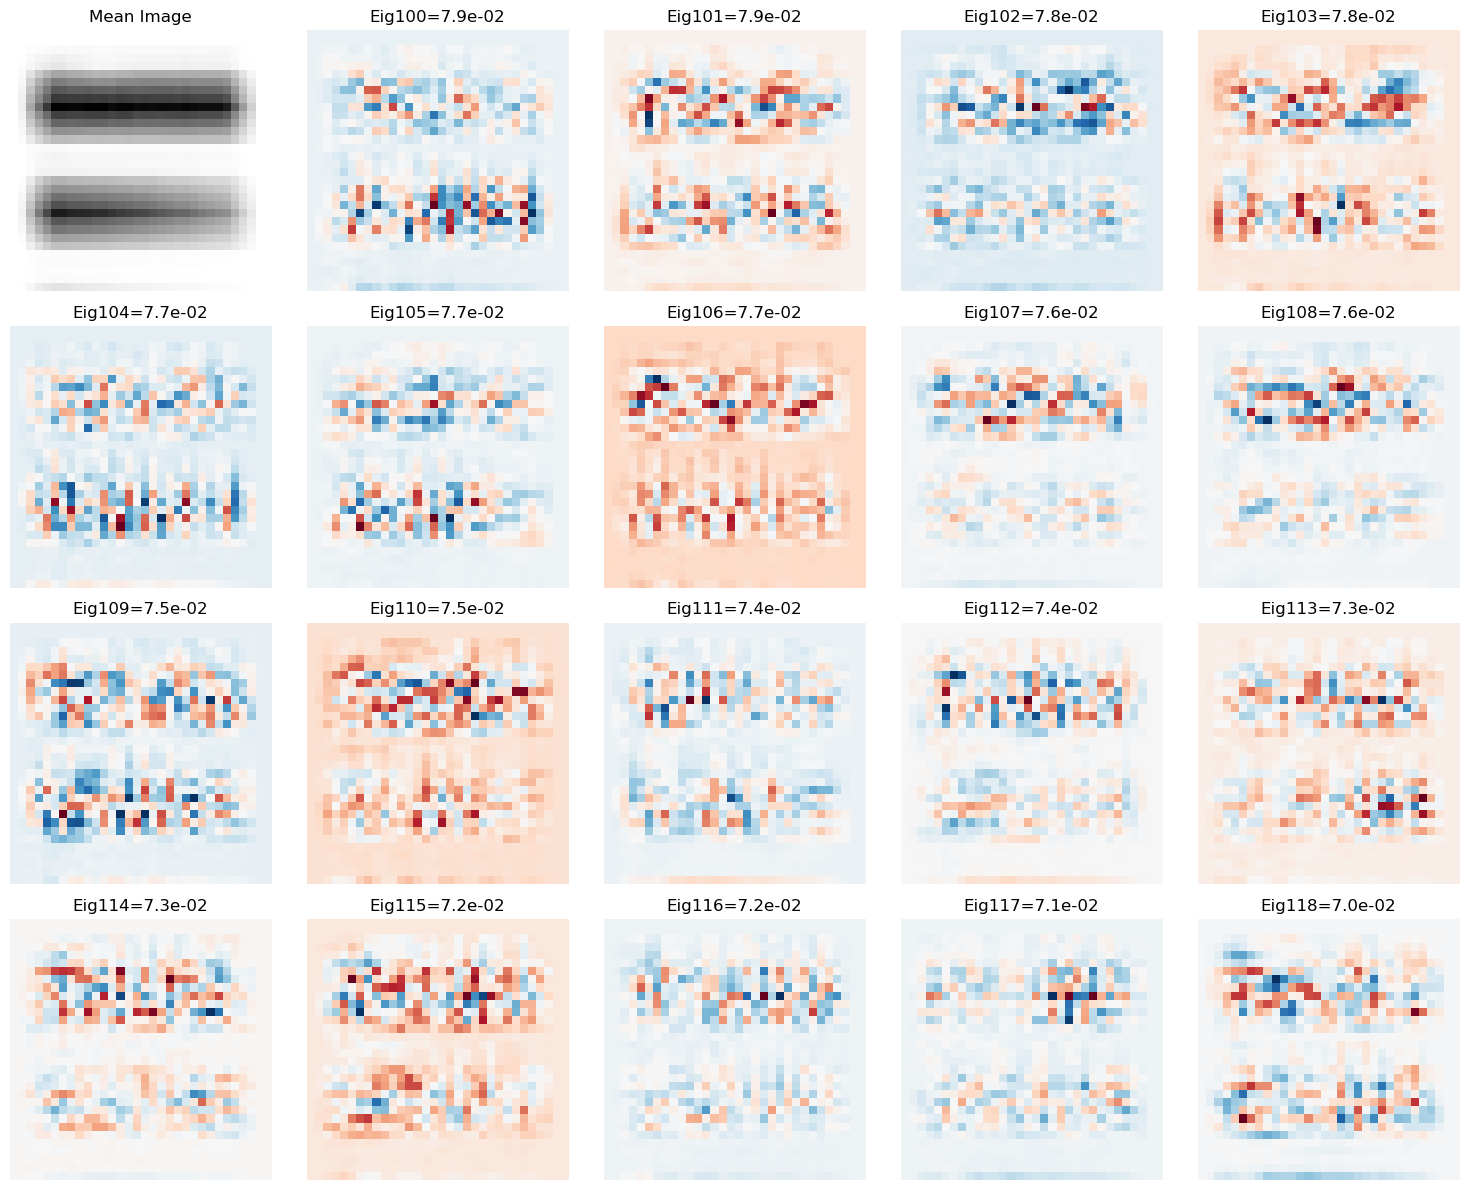

In [16]:
plot_eigenvectors(img_mean, eigval, eigvec, range(100, 119), img_shape=(32, 32))

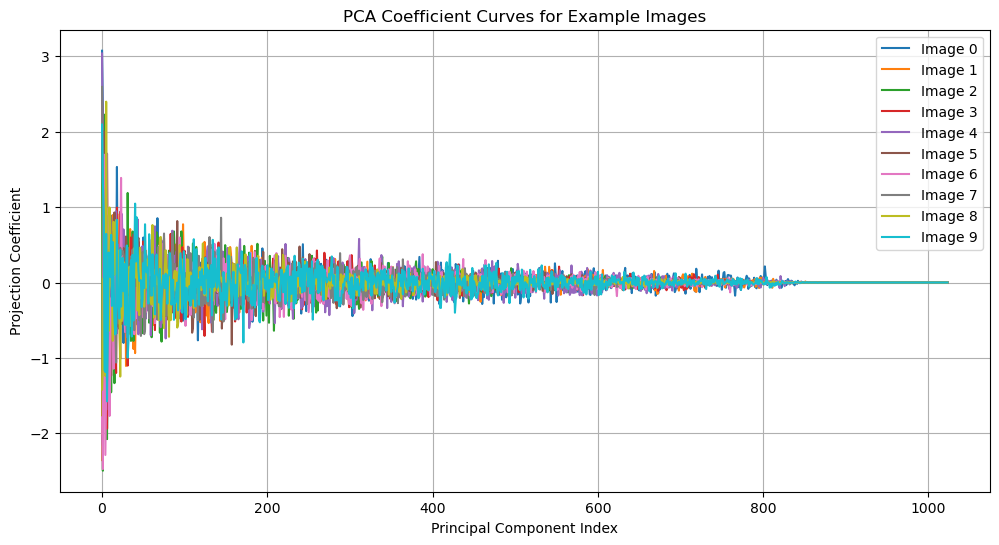

In [ ]:
# Project images onto PC basis
img_centered = image_tensor[:10].view(10,-1).cuda() - img_mean.unsqueeze(0)
coefficients = torch.matmul(img_centered, eigvec)
# Plot coefficient curves for a few example images
n_examples = 10
plt.figure(figsize=(12, 6))
for i in range(n_examples):
    plt.plot(coefficients[i,:].cpu().numpy(), label=f'Image {i}')
plt.xlabel('Principal Component Index')
plt.ylabel('Projection Coefficient')
plt.title('PCA Coefficient Curves for Example Images')
plt.legend()
plt.grid(True)
plt.show()

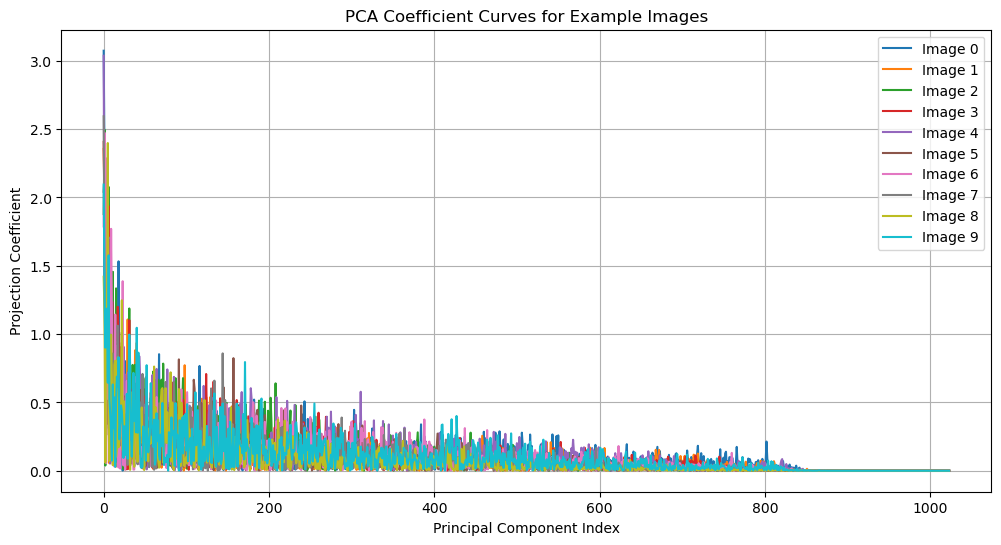

In [ ]:
# Project images onto PC basis
img_centered = image_tensor[:10].view(10,-1).cuda() - img_mean.unsqueeze(0)
coefficients = torch.matmul(img_centered, eigvec)
# Plot coefficient curves for a few example images
n_examples = 10
plt.figure(figsize=(12, 6))
for i in range(n_examples):
    plt.plot(coefficients[i,:].cpu().abs().numpy(), label=f'Image {i}')
plt.xlabel('Principal Component Index')
plt.ylabel('Projection Coefficient')
plt.title('PCA Coefficient Curves for Example Images')
plt.legend()
plt.grid(True)
plt.show()

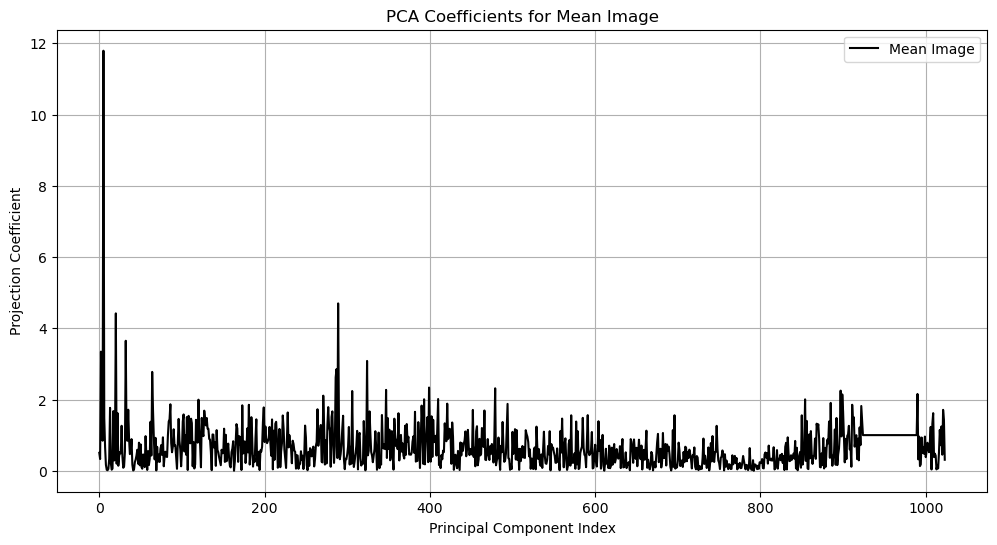

In [19]:
# Project mean image onto PC basis
mean_coefficients = torch.matmul(img_mean, eigvec)

# Plot coefficient curve for mean image
plt.figure(figsize=(12, 6))
plt.plot(mean_coefficients.cpu().abs().numpy(), label='Mean Image', color="black")
plt.xlabel('Principal Component Index')
plt.ylabel('Projection Coefficient') 
plt.title('PCA Coefficients for Mean Image')
plt.legend()
plt.grid(True)
plt.show()


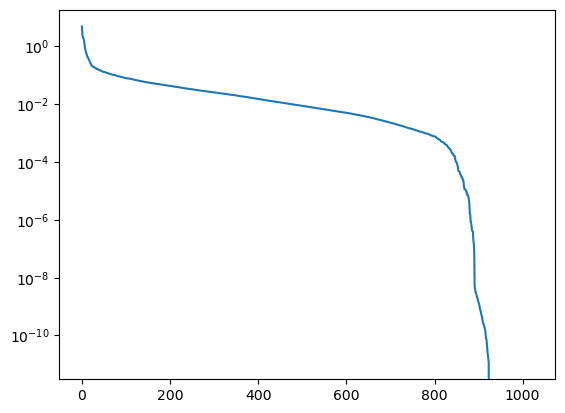

In [22]:
plt.plot(eigval.cpu())
plt.yscale("log")
# plt.xscale()
plt.show()

In [28]:
# Calculate cumulative sum of eigenvalues (variance explained)
cumsum = torch.cumsum(eigval, dim=0) / torch.sum(eigval)

# Find number of components needed for 95% variance
n_components_95 = torch.where(cumsum >= 0.99)[0][0].item() + 1

print(f"Number of components needed to explain 95% of variance: {n_components_95} [{n_components_95/len(eigval):.2f} % of total]")

Number of components needed to explain 95% of variance: 614 [0.60 % of total]


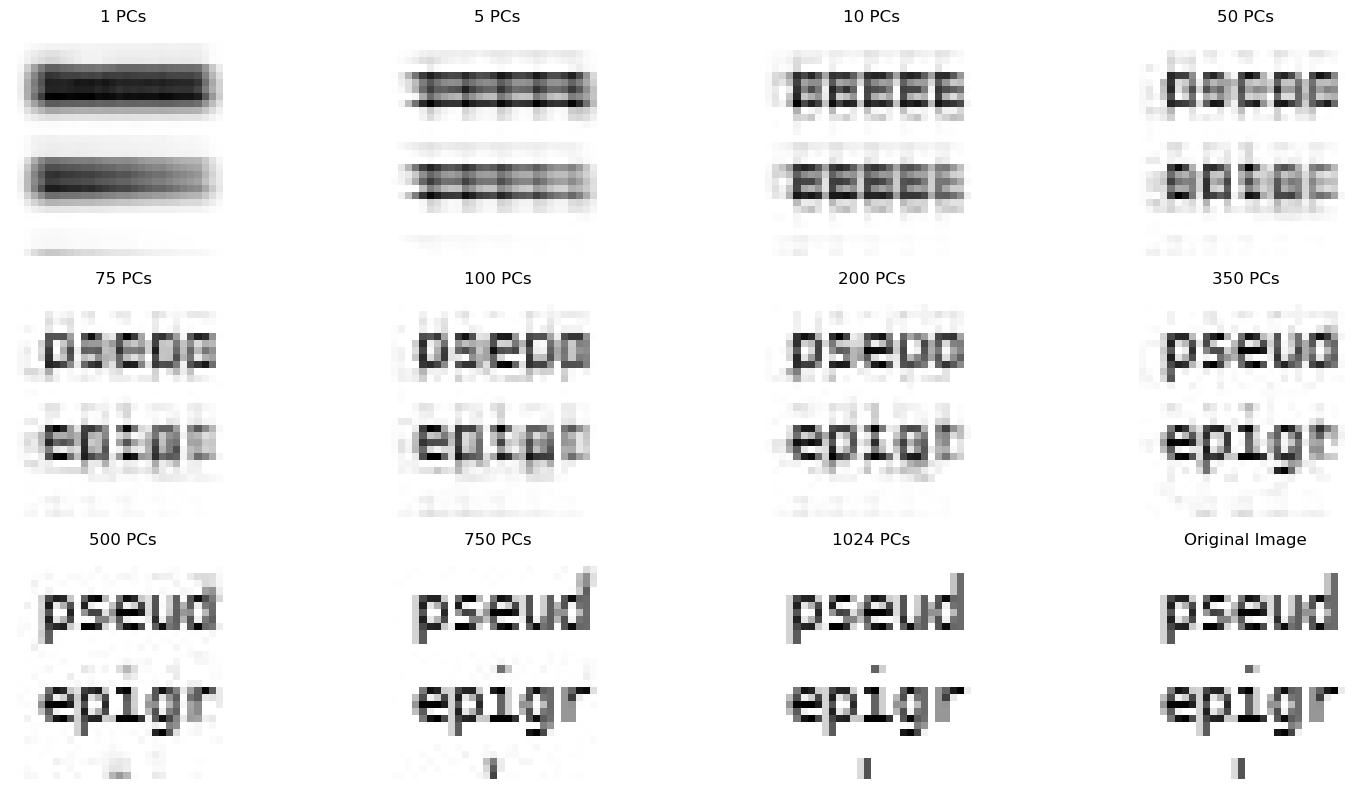

In [61]:
# pick a random image, project it onto PC basis cutoff at certain PC id and reconstruct
# img_id = np.random.randint(0, len(image_tensor))
img_id = np.random.randint(0, len(image_tensor))
random_image = image_tensor[img_id].view(1, -1).cuda()
random_image_centered = random_image - img_mean.unsqueeze(0)
coefficients = torch.matmul(random_image_centered, eigvec)
# reconstruct the image from the coefficients, cutoff at certain PC id
fig, axes = plt.subplots(3, 4, figsize=(16, 8))
n_components_list = [1, 5, 10, 50, 75, 100, 200, 350, 500, 750, 1024]
axs = axes.flatten()
for i, PC_cutoff in enumerate(n_components_list):
    ax = axs[i]
    reconstructed_image = img_mean.unsqueeze(0) + torch.matmul(coefficients[:, :PC_cutoff], eigvec[:, :PC_cutoff].T)
    reconstructed_image = reconstructed_image.view(32, 32)
    ax.imshow(reconstructed_image.clamp(0, 1).cpu().numpy(), cmap="gray")
    ax.set_title(f'{PC_cutoff} PCs')
    ax.axis('off')

axs[-1].imshow(random_image.clamp(0, 1).view(32, 32).cpu().numpy(), cmap="gray")
axs[-1].set_title("Original Image")
axs[-1].axis('off')

plt.tight_layout()
plt.show()


In [56]:
random_image.min()

tensor(0., device='cuda:0')

In [66]:
import torchvision.transforms as T

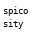

In [67]:
img_tensor = image_tensor[0,0]
img_pil = T.ToPILImage()(img_tensor)
display(img_pil)

(-0.5, 31.5, 31.5, -0.5)

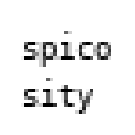

In [73]:
plt.figure(figsize=[1.5,1.5])
plt.imshow(img_tensor, cmap="gray")
plt.axis("off")

### Evaluation via text ocr

In [75]:
import cv2
import pytesseract
from PIL import Image
import numpy as np

# Load the image
img_pil = T.ToPILImage()(img_tensor)

# Convert PIL image to cv2 format - need to convert from RGB to BGR
image = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding for better OCR results
thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Optional: Denoising or morphology operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
processed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Use pytesseract to extract text
custom_config = r'--oem 3 --psm 6'  # Assume a uniform block of text
text = pytesseract.image_to_string(processed, config=custom_config)

print("Extracted Text:")
print(text)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.